# CS530 HW9

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sklearn.model_selection as ms
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Question 1. (3 points)

a. For classification trees, implement three functions to calculate the (1) cross-entropy, (2) Gini index, and (3) misclassification error. Assume binary classification (labels are 0’s and 1’s). The functions takes p_1, the probability of a record belong to class k=1, as input.

In [ ]:
def cal_cross_entropy(p_1):
  p_0 = 1 - p_1
  cross_entropy = -(p_0*math.log(p_0) + p_1*math.log(p_1))
  return cross_entropy

def cal_gini_index(p_1):
  p_0 = 1 - p_1
  gini_index = p_0*(1-p_0) + p_1*(1-p_1)
  return gini_index

def cal_misclassification_error(p_1):
  mc_error = 1 - p_1
  return mc_error

#### Question 2. (3 points)

a. Use the scikit-learn package to construct a single tree with pruning and compare it against Bagging, Random Forest, and Boosting (4 algorthims) on the heart-disease dataset (from last homework). For the ensamble techniques, test different tree numbers (let us set 1000 as the upper limit on the number of tree). After training on the training set, we use each of the 4 models to predict on its test set. Use cross-validation to find the best parameters for these algorithms (including the number of trees, where applicable).

Extra credit (0.5 points)

Try different tree depths in the ensemble methods. Describe how the tree depths relate to the accuracy of the ensemble methods. Explain the results you got. 


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.iloc[:,:-2]
y_train = train.iloc[:,-2]
X_test = test.iloc[:,:-1]
y_test = pd.read_csv("y_test.csv").iloc[:,1]

kf = ms.KFold(n_splits=5, shuffle=True)

For single tree with pruning, using 100 trees give the best AUC.

In [ ]:
#Best AUC after generating 100 randomly generated trees
scores = []
for i in range(100):
  dt = DecisionTreeClassifier()
  scores.append([dt,ms.cross_val_score(dt, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
scores = np.array(scores)
max_index = np.argmax(scores[:,1], axis=0)
dt = scores[max_index,0]
dt.fit(X_train,y_train)
auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("Best AUC: ", auc)

Best AUC:  0.7089397089397089


In [ ]:
#Best AUC testing different max depths
scores = []
depth = 1
for i in range(1,10):
  depth = depth*2
  dt = DecisionTreeClassifier(max_depth = depth)
  scores.append([depth,ms.cross_val_score(dt, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
scores = np.array(scores)
max_index = np.argmax(scores[:,1], axis=0)
dt = DecisionTreeClassifier(max_depth = int(scores[max_index,0]))
dt.fit(X_train,y_train)
auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])
print("Best Tree Depth: ", int(scores[max_index,0]))
print("Best AUC: ", auc)

Best Tree Depth:  2
Best AUC:  0.806999306999307


For Bagging, using 100 trees give the best AUC.

In [ ]:
#Best AUC testing with different number of trees
params = [50,100,200,300,400]
scores = []
for param in params:
  bag = BaggingClassifier(n_estimators=param)
  scores.append([param,ms.cross_val_score(bag, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
scores = np.array(scores)
max_index = np.argmax(scores[:,1], axis=0)
bag = BaggingClassifier(n_estimators=int(scores[max_index,0]),random_state=42)
bag.fit(X_train,y_train)
auc = roc_auc_score(y_test, bag.predict_proba(X_test)[:,1])
print("Best Number of Trees: ", int(scores[max_index,0]))
print("Best AUC: ", auc)

Best Number of Trees:  100
Best AUC:  0.8932778932778933


In [ ]:
#Best AUC testing with different number of trees and tree depth
params = [50,100,200,300,400]
scores = []
depth = 1
for i in range(10):
  dt = DecisionTreeClassifier(max_depth = depth)
  for param in params:
    bag = BaggingClassifier(base_estimator=dt,n_estimators=param)
    scores.append([depth,param,ms.cross_val_score(bag, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
  depth = depth*2
scores = np.array(scores)
max_index = np.argmax(scores[:,2], axis=0)
dt = DecisionTreeClassifier(max_depth = int(scores[max_index,0]))
bag = BaggingClassifier(base_estimator=dt,n_estimators=int(scores[max_index,1]))
bag.fit(X_train,y_train)
auc = roc_auc_score(y_test, bag.predict_proba(X_test)[:,1])
print("Best Tree Depth: ", int(scores[max_index,0]))
print("Best Number of Trees: ", int(scores[max_index,1]))
print("Best AUC: ", auc)

Best Tree Depth:  4
Best Number of Trees:  300
Best AUC:  0.8932778932778933


In [ ]:
#Get scores for bagging when altering number of trees for plotting
scores_bag = []
param = 1
for i in range(100):
  bag = BaggingClassifier(n_estimators=param)
  bag.fit(X_train,y_train)
  scores_bag.append([param,bag.score(X_test, y_test)])
  param = param+10
scores_bag = np.array(scores_bag)

In [ ]:
#Get scores for bagging when altering tree depth for plotting
scores_bag_depth = []
depth = 1
for i in range(100):
  dt = DecisionTreeClassifier(max_depth = depth)
  bag = BaggingClassifier(base_estimator=dt,n_estimators=100)
  bag.fit(X_train,y_train)
  scores_bag_depth.append([depth,bag.score(X_test, y_test)])
  depth = depth+10
scores_bag_depth = np.array(scores_bag_depth)

For Random Forest, using 300 trees give the best AUC

In [ ]:
#Best AUC testing with different number of trees
params = [50,100,200,300,400]
scores = []
for param in params:
  rf = RandomForestClassifier(n_estimators=param)
  scores.append([param,ms.cross_val_score(rf, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
scores = np.array(scores)
max_index = np.argmax(scores[:,1], axis=0)
rf = RandomForestClassifier(n_estimators=int(scores[max_index,0]))
rf.fit(X_train,y_train)
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("Best Number of Trees: ", int(scores[max_index,0]))
print("Best AUC: ", auc)

Best Number of Trees:  200
Best AUC:  0.9164934164934164


In [ ]:
#Best AUC testing with different number of trees and tree depth
params = [50,100,200,300,400]
scores = []
depth = 1
for i in range(10):
  for param in params:
    rf = RandomForestClassifier(max_depth=depth,n_estimators=param)
    scores.append([depth,param,ms.cross_val_score(rf, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
  depth = depth*2
scores = np.array(scores)
max_index = np.argmax(scores[:,2], axis=0)
rf = RandomForestClassifier(max_depth = int(scores[max_index,0]),n_estimators=int(scores[max_index,1]))
rf.fit(X_train,y_train)
auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("Best Tree Depth: ", int(scores[max_index,0]))
print("Best Number of Trees: ", int(scores[max_index,1]))
print("Best AUC: ", auc)

Best Tree Depth:  512
Best Number of Trees:  200
Best AUC:  0.9189189189189189


In [ ]:
#Get scores for random forest when altering number of trees for plotting
scores_rf = []
param = 1
for i in range(100):
  rf = RandomForestClassifier(n_estimators=param)
  rf.fit(X_train,y_train)
  scores_rf.append([param,rf.score(X_test, y_test)])
  param = param+10
scores_rf = np.array(scores_rf)

In [ ]:
#Get scores for random forest when altering tree depth for plotting
scores_rf_depth = []
depth = 1
for i in range(100):
  rf = RandomForestClassifier(max_depth=depth,n_estimators=200)
  rf.fit(X_train,y_train)
  scores_rf_depth.append([depth,rf.score(X_test, y_test)])
  depth = depth+10
scores_rf_depth = np.array(scores_rf_depth)

For Boosting, using 100 trees give the best AUC.


In [ ]:
#Best AUC testing with different number of trees
params = [50,100,200,300,400]
scores = []
for param in params:
  boost = GradientBoostingClassifier(n_estimators=param)
  scores.append([param,ms.cross_val_score(boost, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
scores = np.array(scores)
max_index = np.argmax(scores[:,1], axis=0)
boost = GradientBoostingClassifier(n_estimators=int(scores[max_index,0]))
boost.fit(X_train,y_train)
auc = roc_auc_score(y_test, boost.predict_proba(X_test)[:,1])
print("Best Number of Trees: ", int(scores[max_index,0]))
print("Best AUC: ", auc)

Best Number of Trees:  100
Best AUC:  0.8821898821898821


In [ ]:
#Best AUC testing with different number of trees and tree depth
params = [50,100,200,300,400]
scores = []
depth = 1
for i in range(10):
  for param in params:
    boost = GradientBoostingClassifier(max_depth=depth,n_estimators=param)
    scores.append([depth,param,ms.cross_val_score(boost, X_train, y_train, scoring = "roc_auc", cv = kf).mean()])
  depth = depth*2
scores = np.array(scores)
max_index = np.argmax(scores[:,2], axis=0)
boost = GradientBoostingClassifier(max_depth = int(scores[max_index,0]),n_estimators=int(scores[max_index,1]))
boost.fit(X_train,y_train)
auc = roc_auc_score(y_test, boost.predict_proba(X_test)[:,1])
print("Best Tree Depth: ", int(scores[max_index,0]))
print("Best Number of Trees: ", int(scores[max_index,1]))
print("Best AUC: ", auc)

Best Tree Depth:  1
Best Number of Trees:  50
Best AUC:  0.9178794178794178


In [ ]:
#Get scores for boosting when altering number of trees for plotting
scores_boost = []
param = 1
for i in range(100):
  boost = GradientBoostingClassifier(n_estimators=param)
  boost.fit(X_train,y_train)
  scores_boost.append([param,boost.score(X_test, y_test)])
  param = param+10
scores_boost = np.array(scores_boost)

In [ ]:
#Get scores for boosting when altering tree depth for plotting
scores_boost_depth = []
depth = 1
for i in range(100):
  boost = GradientBoostingClassifier(max_depth=depth,n_estimators=100)
  boost.fit(X_train,y_train)
  scores_boost_depth.append([depth,boost.score(X_test, y_test)])
  depth = depth+10
scores_boost_depth = np.array(scores_boost_depth)

b. On the same axes, plot the test-set accuracy versus the number of trees for all the ensemble methods (similarly to the plots comparing ensemble methods and single decision trees shown in class). 

Text(0.5, 1.0, 'Test Accuracy vs Tree Depth')

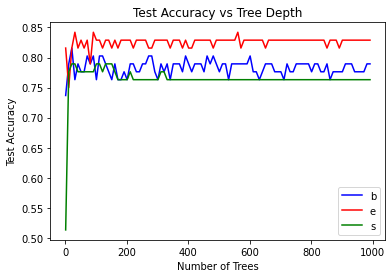

In [ ]:
plt.plot(scores_bag[:,0],scores_bag[:,1],c="b",label="Bagging")
plt.plot(scores_rf[:,0],scores_rf[:,1],c="r",label="Random Forest")
plt.plot(scores_boost[:,0],scores_boost[:,1],c="g",label="Boosting")
plt.legend("best")
plt.xlabel("Number of Trees")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Tree Depth")

Text(0.5, 1.0, 'Test Accuracy vs Tree Depth')

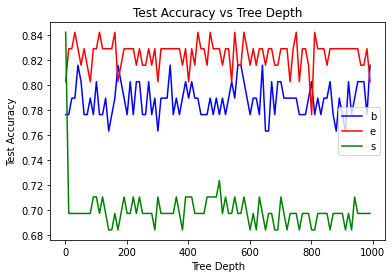

In [ ]:
plt.plot(scores_bag_depth[:,0],scores_bag_depth[:,1],c="b",label="Bagging")
plt.plot(scores_rf_depth[:,0],scores_rf_depth[:,1],c="r",label="Random Forest")
plt.plot(scores_boost_depth[:,0],scores_boost_depth[:,1],c="g",label="Boosting")
plt.legend("best")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy vs Tree Depth")

c. Explain your results in 2a. Why might the results vary across algorithms?

Based on the results, Random Forest had the best accuracy amongst the other classifiers. This was followed by Bagging and then Boosting. The reason for the variation is that the shape of the data determines the performance of each algorithm. The algorthims appear to stabalize fairly quickly by increasing the number of trees, however the accuracy when changing the maximum tree depth is far more variable, leading to the conclusion the tree depth doesn't have as much impact on accuracy.

#### Question 3. (4 points)


**Complete question 3 as a group** with your final-project group. Only one person needs to submit the answers to the following questions either directly into colab or provide a link to a google doc below. Please include the names of the people in your group in your submission.  

Take a good look at your dataset before answering the questions below. Then answer the following questions about your dataset/project. 

a. Describe your dataset. What problem(s) are you trying to solve/what are you trying to learn from the data?  

b. What is the overall size of your data file?

c. How many samples, features, targets (labels or outputs) do you have?  

d. What type of preprocessing needs to be done on the data? Have you thought about the preprocessing pipeline (if any)? Describe it, if applicable. 

e. Perform a PRELIMINARY visualization of your data. Use whatever type of visualization makes most sense for your data (i.e., scatter plot, variable counts - histograms, plotting images in your dataset). Copy and paste the visualization plots either below or in the google doc to submit.  

f. What machine learning methods that we have learned so far can be used for this dataset?  



# Either answer here in colab or provide link to google doc

https://docs.google.com/document/d/1Cs6r4s0NoQNgLd6vUU2La4H5vu6-zGp0XLFflO9oX_Q/edit

